1. Import everything

In [1]:
from matplotlib import pyplot as plt

import cv2 as cv
cv.__version__

'4.0.1'

2. Load the input image and show its dimensions, 
keeping in mind that images are represented as a multi-dimensional NumPy array 
with shape № rows (height) x, № columns (width) x, № channels (depth).

In [17]:
image = cv.imread('picture_1.jpg')
(h, w, d) = image.shape
print("width = {}, height = {}, depth = {}".format(w, h, d))

width = 844, height = 589, depth = 3


3. Display the input image. As openCV loads in BGR format by default, 
we want to show it in RGB.

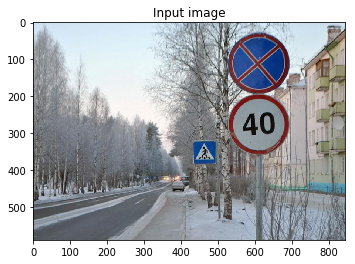

In [3]:
plt.title('Input image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

4. Get the RGB pixel located at x=57, y=157, 
keeping in mind that OpenCV stores images in BGR order rather than RGB

In [4]:
(B, G, R) = image[157, 57]
print("red = {}, green = {}, blue = {}".format(R, G, B))

red = 167, green = 170, blue = 175


5. Extract a ROI (Region of Interest) from the input image 
starting at x=520,y=15 at ending at x=700,y=360

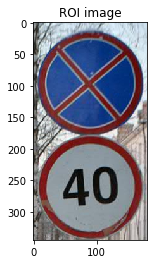

In [5]:
roi = image[15:360, 520:700]
plt.title('ROI image')
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
plt.show()

6. Resize the image to 250x250px, ignoring aspect ratio

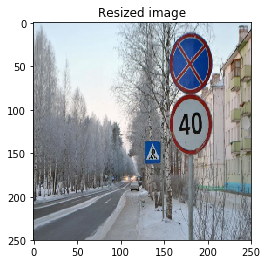

In [6]:
# (250. 250) - (w, h)
resized_image = cv.resize(image, (250, 250))
plt.title('Resized image')
plt.imshow(cv.cvtColor(resized_image, cv.COLOR_BGR2RGB))
plt.show()

7. Next resize with computing the new width by present height based on the aspect ratio

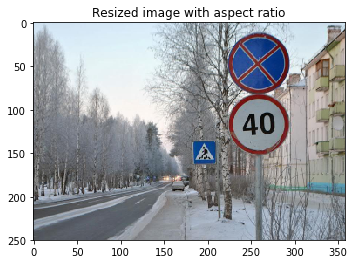

width = 358, height = 250, depth = 3


In [7]:
aspect_ratio = w / h
resized_image_with_aspect_ration = cv.resize(image, (int(250 * aspect_ratio), 250))
plt.title('Resized image with aspect ratio')
plt.imshow(cv.cvtColor(resized_image_with_aspect_ration, cv.COLOR_BGR2RGB))
plt.show()
(h1, w1, d1) = resized_image_with_aspect_ration.shape
print("width = {}, height = {}, depth = {}".format(w1, h1, d1))

8. Rotate an image 15 degrees counterwise.
First we compute the image center, then construct the rotation matrix
and after that applying the affine warp. 
Remember that counterwise rotation is 15 and clockwise is -15.

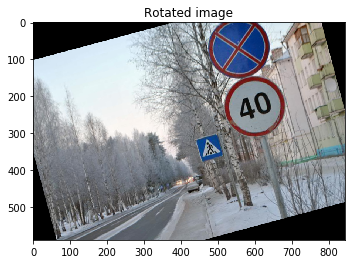

In [8]:
angle = 15
center = (w // 2, h // 2)
rotation_mat = cv.getRotationMatrix2D(center, angle, 1.0)
rotated = cv.warpAffine(image, rotation_mat, (w, h))
plt.title('Rotated image')
plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))
plt.show()

9. Rotate an image 15 degrees counterwise without cropping

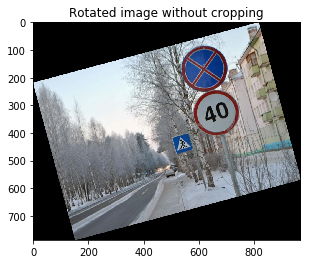

In [9]:
rotation_mat = cv.getRotationMatrix2D(center, angle, 1.0)
#count angle cos and sin
angle_cos = abs(rotation_mat[0, 0])
angle_sin = abs(rotation_mat[0, 1])

#count width and height bounds
w_rotated_not_cropped = int(w * angle_cos + h * angle_sin)
h_rotated_not_cropped = int(w * angle_sin + h * angle_cos)

 # subtract old image center (bringing image back to origo) and adding the new image center coordinates
rotation_mat[0, 2] += w_rotated_not_cropped/2 - center[0]
rotation_mat[1, 2] += h_rotated_not_cropped/2 - center[1]

rotated_not_cropped = cv.warpAffine(image, rotation_mat, (w_rotated_not_cropped, h_rotated_not_cropped))
plt.title('Rotated image without cropping')
plt.imshow(cv.cvtColor(rotated_not_cropped, cv.COLOR_BGR2RGB))
plt.show()

10. Apply a Gaussian blur with a 35x35 kernel to the image to smooth it.
Is useful when reducing high frequency noise

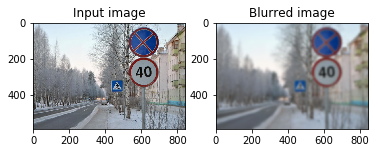

In [10]:
blurred = cv.GaussianBlur(image, (35, 35), 0)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Input image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
plt.title('Blurred image')
plt.show()

11. Draw on the image

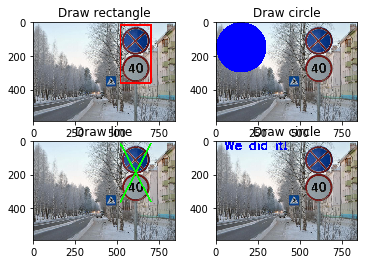

In [40]:
output_rectangle = image.copy()
cv.rectangle(output_rectangle, (520, 15), (700, 360), (0, 0, 255), 10)
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(output_rectangle, cv.COLOR_BGR2RGB))
plt.title("Draw rectangle")

output_circle = image.copy()
cv.circle(output_circle, (150, 150), 150, (255, 0, 0), -1)
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(output_circle, cv.COLOR_BGR2RGB))
plt.title('Draw circle')

output_line = image.copy()
cv.line(output_line, (520, 15), (700, 360), (0, 255, 0), 10)
cv.line(output_line, (700, 15), (520, 360), (0, 255, 0), 10)
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(output_line, cv.COLOR_BGR2RGB))
plt.title('Draw line')

output_text = image.copy()
cv.putText(output_text, "We did it!", (50, 50), cv.FONT_HERSHEY_SIMPLEX, 2.5, (255, 0, 0), 10)
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(output_text, cv.COLOR_BGR2RGB))
plt.title('Draw text')
plt.show()